In [11]:
import torch 
import transformers

import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt_tab')

In [2]:
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jako\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [3]:
raw_text = [
    "This is a statement",
    "This is another statement but longer",
    "This is"
]

In [5]:
tokenizer(raw_text)

{'input_ids': [[101, 1188, 1110, 170, 4195, 102], [101, 1188, 1110, 1330, 4195, 1133, 2039, 102], [101, 1188, 1110, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]]}

In [7]:
tokenizer(raw_text, padding=True)

{'input_ids': [[101, 1188, 1110, 170, 4195, 102, 0, 0], [101, 1188, 1110, 1330, 4195, 1133, 2039, 102], [101, 1188, 1110, 102, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0]]}

In [8]:
tokenizer(raw_text, padding=True, return_tensors="pt")

{'input_ids': tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0]])}

In [10]:
tokenized_text = tokenizer(raw_text, padding=True, return_tensors="pt")
print(tokenized_text)

{'input_ids': tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0]])}


In [18]:
tokenized_text["input_ids"][:, :]

tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]])

Text(0.5, 0, 'Third sentence tokens')

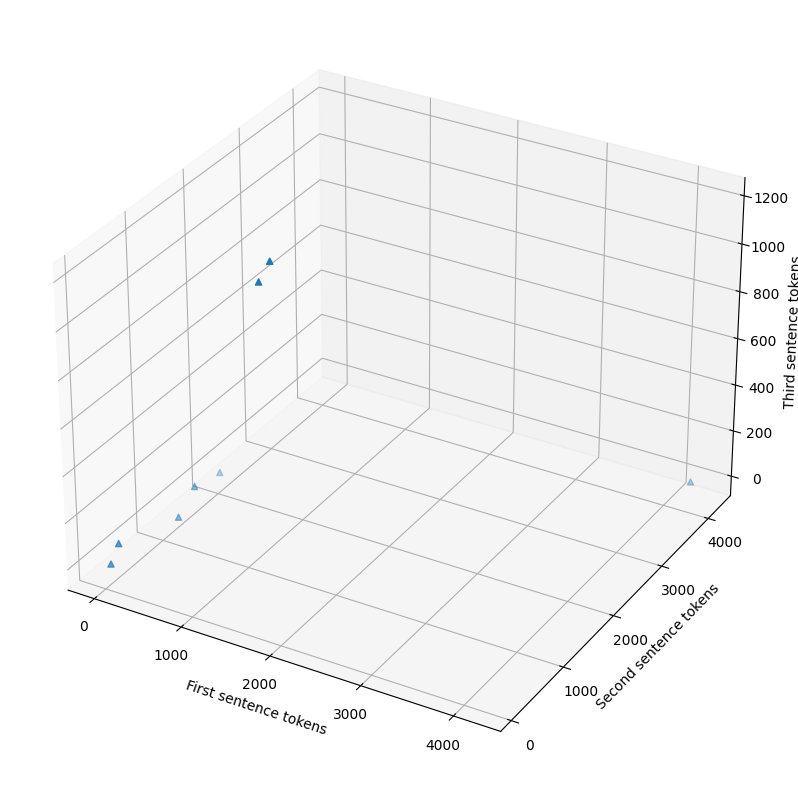

In [38]:
x = tokenized_text["input_ids"][0, :].detach().cpu().numpy()
y = tokenized_text["input_ids"][1, :].detach().cpu().numpy()
z = tokenized_text["input_ids"][2, :].detach().cpu().numpy()

fig = plt.figure(figsize=(15,10))
axes = plt.subplot(1,1,1, projection="3d")
# axes.plot(x, y , z)

axes.scatter(x, y, z, marker="^")
axes.set_xlabel("First sentence tokens")
axes.set_ylabel("Second sentence tokens")
axes.set_zlabel("Third sentence tokens")

In [44]:
# Dictionary of tokennized text
tokenized_text.keys(), tokenized_text.values()

(dict_keys(['input_ids', 'token_type_ids', 'attention_mask']),
 dict_values([tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
         [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
         [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), tensor([[0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0]]), tensor([[1, 1, 1, 1, 1, 1, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 0]])]))

In [45]:
tokenized_text["input_ids"]

tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]])

In [57]:
idx = 0

while idx < len(tokenized_text["input_ids"]):
    print(f"Sentence number -> {idx+1}, Sentence = {raw_text[idx].split()}, ")
    print(f"\t input_ids \t-> { tokenized_text['input_ids'][idx] }, \n\t attention_mask -> {tokenized_text['attention_mask'][idx]}")
    idx = idx + 1

Sentence number -> 1, Sentence = ['This', 'is', 'a', 'statement'], 
	 input_ids 	-> tensor([ 101, 1188, 1110,  170, 4195,  102,    0,    0]), 
	 attention_mask -> tensor([1, 1, 1, 1, 1, 1, 0, 0])
Sentence number -> 2, Sentence = ['This', 'is', 'another', 'statement', 'but', 'longer'], 
	 input_ids 	-> tensor([ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102]), 
	 attention_mask -> tensor([1, 1, 1, 1, 1, 1, 1, 1])
Sentence number -> 3, Sentence = ['This', 'is'], 
	 input_ids 	-> tensor([ 101, 1188, 1110,  102,    0,    0,    0,    0]), 
	 attention_mask -> tensor([1, 1, 1, 1, 0, 0, 0, 0])


In [70]:
base_model = transformers.AutoModel.from_pretrained("bert-base-cased")
base_model_cls = transformers.AutoModelForSequenceClassification.from_pretrained("bert-base-cased")

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
torch.nn.functional.softmax(input=base_model_cls(**tokenized_text)["logits"], dim=-1) # Using **kwargs because tokenized_text is a dict

tensor([[0.4798, 0.5202],
        [0.4755, 0.5245],
        [0.4867, 0.5133]], grad_fn=<SoftmaxBackward0>)

In [91]:
base_model(**tokenized_text)["pooler_output"]

tensor([[-0.7647,  0.5200,  1.0000,  ...,  1.0000, -0.5775,  0.9943],
        [-0.7219,  0.4804,  0.9999,  ...,  1.0000, -0.7174,  0.9900],
        [-0.6704,  0.4654,  0.9999,  ...,  1.0000, -0.5226,  0.9888]],
       grad_fn=<TanhBackward0>)

In [88]:
torch.nn.functional.softmax(input=base_model(**tokenized_text)["pooler_output"], dim=-1)

tensor([[0.0005, 0.0017, 0.0027,  ..., 0.0027, 0.0006, 0.0027],
        [0.0005, 0.0016, 0.0027,  ..., 0.0027, 0.0005, 0.0027],
        [0.0005, 0.0016, 0.0027,  ..., 0.0027, 0.0006, 0.0027]],
       grad_fn=<SoftmaxBackward0>)

In [135]:
trump_speech_uniondale = """
And you know what happened? I got eviscerated when I went backstage. 
I went backstage, but I’m not like Biden where he takes… I fight back with my people. 
Remember, we still signed the check. 
They said, “Sir, that’s a terrible thing to have said.” I said, “What is?” “What you said, “What the hell do you have to lose?” 
It’s terrible. It’s demeaning. It’s horrible.” I said, “But it’s true.”
We will renovate the New York Subway so that the greatest city in the world finally has again the greatest transit system anywhere in the world. 
You have the basics. We have to clean it. We have to take care of it. We have to give it a little love. 
And we have to get the criminals the hell out there. We will once again support our incredible police officers, New York’s finest, a lot of them. 
I’ve got the support. To me, this is so important. I think to you, it’s… Every single police group in the nation is supporting me. 
The other day, The Fraternal Order, it’s the largest, they gave us 400,000 police and they gave us a unanimous endorsement, we have it from everybody, have it from everybody. 
We will work with the mayors and the governor to rebuild your defunded and depleted police forces, including New York’s finest and NYPD.
"""

In [138]:
splittext = [text.split() for text in raw_text]

In [139]:
import pandas as pd

In [140]:
all_words = sum(splittext, [])
all_words = pd.Series(all_words)

In [141]:
all_words.value_counts(), [len(word) for word in all_words.unique()]

(This         3
 is           3
 statement    2
 a            1
 another      1
 but          1
 longer       1
 Name: count, dtype: int64,
 [4, 2, 1, 9, 7, 3, 6])

In [151]:
trump_words = trump_speech_uniondale.lower().split()
trump_words = pd.Series(trump_words)

The word 'and' is occurring 17 times but we see that a simple split doesn't account for identical words but which ends with a punctuation

In [171]:
trump_words.value_counts()

the          17
have          9
to            9
we            9
i             7
             ..
terrible.     1
lose?”        1
do            1
is?”          1
nypd.         1
Name: count, Length: 133, dtype: int64

#### Let's try to use NLTK to separate the words for us

In [165]:
word_tokens = nltk.word_tokenize(trump_speech_uniondale.lower())
word_tokens = pd.Series(word_tokens)

In [221]:
word_tokens.value_counts()[:20]

.         17
,         17
the       17
it        11
’         11
we         9
i          9
have       9
to         9
s          8
and        6
you        5
”          5
“          5
police     4
said       4
a          4
what       4
will       3
?          3
Name: count, dtype: int64

#### Using NLTK word tokenizer expands the token registry from 226 with our simple method up to 295 tokens

In [175]:
len(trump_words), len(word_tokens)

(226, 295)

In [202]:
simple_plotting = trump_words.value_counts().reset_index()
nltk_plotting = word_tokens.value_counts().reset_index()

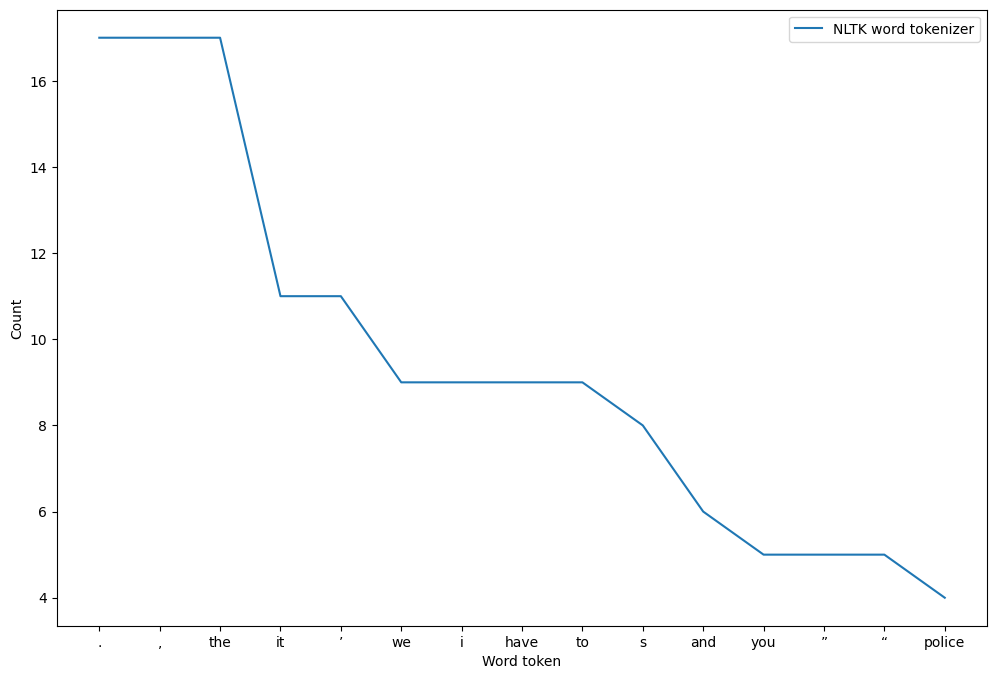

In [219]:
plt.figure(figsize=(12, 8))
plt.plot(nltk_plotting["index"][:15], nltk_plotting["count"][:15], label="NLTK word tokenizer")


plt.xlabel("Word token")
plt.ylabel("Count")
plt.legend()

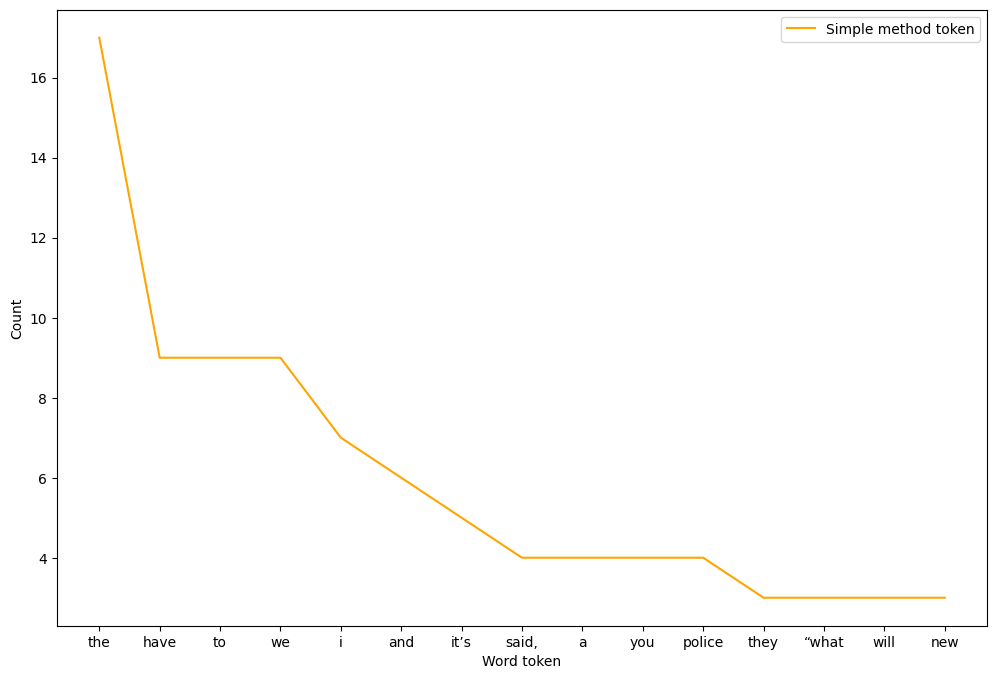

In [218]:
plt.figure(figsize=(12, 8))
plt.plot(simple_plotting["index"][:15], simple_plotting["count"][:15], color="orange", label="Simple method token")

plt.xlabel("Word token")
plt.ylabel("Count")
plt.legend()

In [272]:
trump_speech_las_vegas_partial = """
Thank you very much, everybody. Hello, Las Vegas. Hello, Las Vegas. 
I’m thrilled to be back in this incredible state with thousands of proud, hardworking American patriots, which is what you are. 
As you all saw three months ago, we had a monumental victory. We had a beautiful victory three months ago. 
And then, a couple of nights ago, we had an even better victory. We took her on, Comrade Kamala Harris. 
We took her on and we did really well. Every poll had us up like 90, 92, 87. We actually had one, 92 to 6, which sounds about right because now today, Rasmussen just came up, and we were six points up. 
So, it’s pretty good. Pretty good. We dismantled her terrible record, we exposed her radical liberal agenda, and we laid out our plans to quite simply make America great again. 
Meanwhile, Comrade Kamala Harris, Comrade showed up, spewing lies and meaningless platitudes with no plans, no policies, and no solutions whatsoever. She doesn’t have a clue. 
The only thing she had was a lot of people trying to push her over the line. It’s not happening. We’re not going to let this country be destroyed. It’s already in deep trouble. 
She offered American voters nothing but falsehoods and hoaxes while our country is being destroyed. Our country is being destroyed, do we know that?
Not going to be for long.
Honestly, November, November 5th, is going to be the most important day in the history of our country, I really believe it.

And today, she had a terrible interview. Did you see the interview she had today? She can’t talk. She can’t talk. She can’t talk without maybe getting the answers. 
What’s the story with that? Did she get the questions, do you think? So, I hear she got the questions, and I also heard she had something in the ear, a little something in the ear. 
“No Kamala, do this. Say it this way, Kamala. Okay, be quiet. Too many people watching.” She had a terrible interview today with the Philadelphia TV station. A big word salad. 
She just kept talking, talking, talking. She had no idea what the hell she was saying. She reminded me of Sleepy Joe Biden.

But people said that I was angry during debate, and I said, “Why wouldn’t I be angry? Of course I’m angry. 
We got 21 million people that came into our country, invading our communities, invading our cities and our towns, and destroying our country. 
I’m angry about Venezuelan gangs taking over Aurora, Colorado, and I’m angry about illegal Haitian migrants taking over Springfield, Ohio.” 
You see that mess, don’t you? And the Colorado governor is petrified. He’s scared. He doesn’t know what to do. “The Venezuelans are attacking my state!” He said. 
“The Venezuelans have big AK-47 Supremes.” This is Supreme. Where the hell do they get these guns? Our soldiers can’t get these guns. They’re taking over our country from within, can you believe?

"""

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [273]:
prep_trump_speech = nltk.sent_tokenize(trump_speech_las_vegas_partial)

In [302]:
vectorizer = TfidfVectorizer()
cnt_vectorizer = CountVectorizer()

X = vectorizer.fit_transform(prep_trump_speech)
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.32015421],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23977742]])

In [275]:
doc_term = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=[prep_trump_speech])
doc_term = doc_term.filter(regex=r'^[^\d]')    # Drop columns that starts with an integer

In [269]:
import seaborn as sns

#### Plotting a heatmap of the words and the sentences shows us words that are frequent in a sentence (repeated words)
#### This could show us what words Trump prefer to use


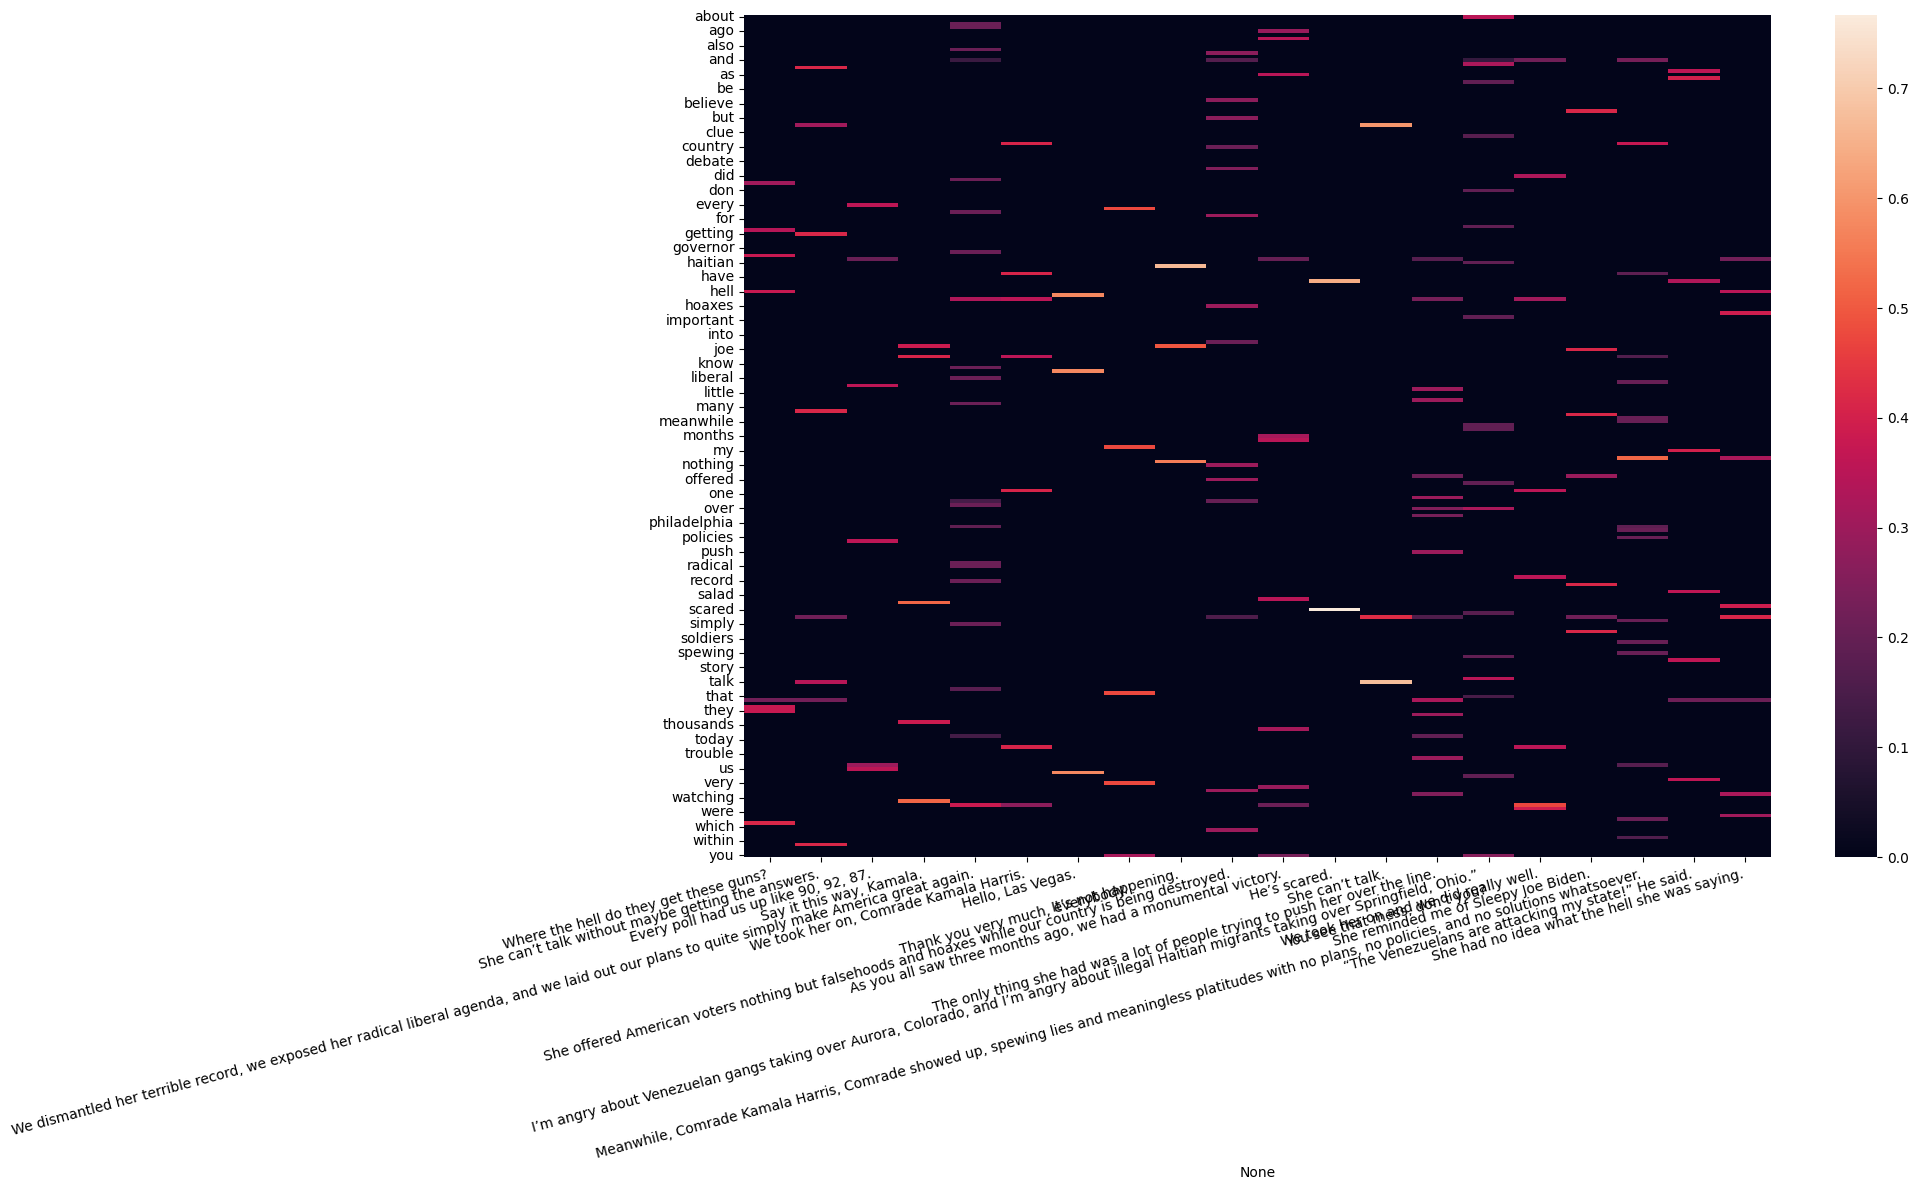

In [300]:
np.random.seed(1990)    # For reproducibility
plt.figure(figsize=(20, 12))
sns.heatmap(doc_term.sample(20).T)  # Randomly sample 20 sentences

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

In [375]:
trump_count_tokens = pd.json_normalize(cnt_vectorizer.vocabulary_).T.reset_index().rename(columns={"index":"wordtoken", 0:"count"}).sort_values(by="count", ascending=False).reset_index().drop(columns="index")
trump_count_tokens

,wordtoken,count
0,you,238
1,wouldn,237
2,word,236
3,without,235
4,within,234
...,...,...
234,90,4
235,87,3
236,5th,2
237,47,1


c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'you'),
  Text(1, 0, 'wouldn'),
  Text(2, 0, 'word'),
  Text(3, 0, 'without'),
  Text(4, 0, 'within'),
  Text(5, 0, 'with'),
  Text(6, 0, 'why'),
  Text(7, 0, 'while'),
  Text(8, 0, 'which'),
  Text(9, 0, 'where'),
  Text(10, 0, 'whatsoever'),
  Text(11, 0, 'what'),
  Text(12, 0, 'were'),
  Text(13, 0, 'well'),
  Text(14, 0, 'we'),
  Text(15, 0, 'way'),
  Text(16, 0, 'watching'),
  Text(17, 0, 'was'),
  Text(18, 0, 'voters'),
  Text(19, 0, 'victory'),
  Text(20, 0, 'very'),
  Text(21, 0, 'venezuelans'),
  Text(22, 0, 'venezuelan'),
  Text(23, 0, 'vegas'),
  Text(24, 0, 'us'),
  Text(25, 0, 'up'),
  Text(26, 0, 'tv'),
  Text(27, 0, 'trying'),
  Text(28, 0, 'trouble'),
  Text(29, 0, 'towns')])

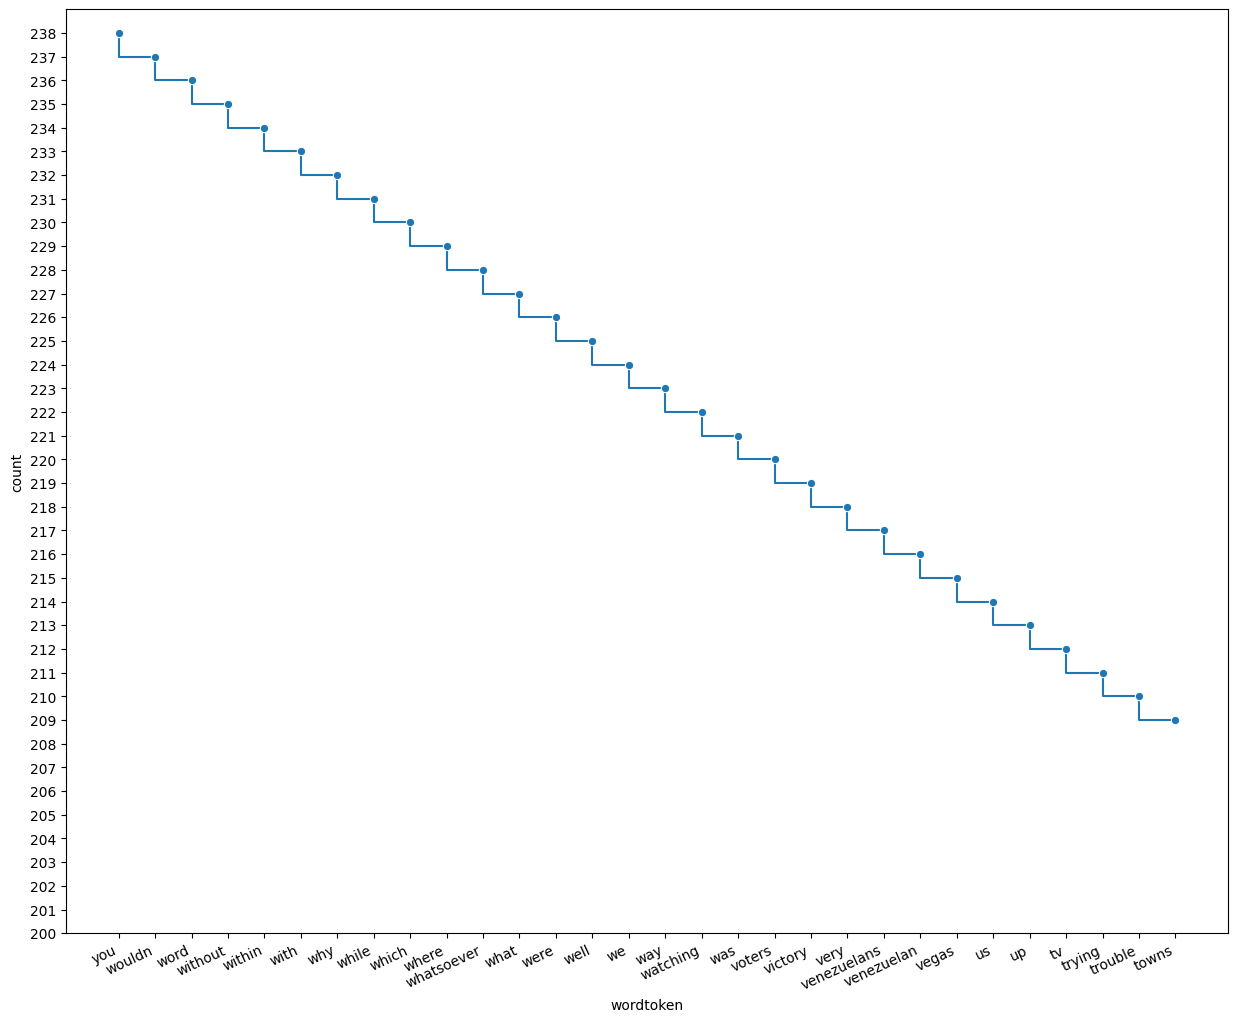

In [367]:
plt.figure(figsize=(15, 12))
sns.lineplot(x=trump_count_tokens.wordtoken[:30], y=trump_count_tokens["count"][:30], marker="o", drawstyle="steps-pre")

y_ticks = range(trump_count_tokens["count"].min(), trump_count_tokens["count"].max()+1)

plt.yticks(y_ticks)
plt.ylim(200, trump_count_tokens["count"].max()+1)

plt.xticks(rotation=25, ha='right')

c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'colorado'),
  Text(1, 0, 'clue'),
  Text(2, 0, 'cities'),
  Text(3, 0, 'can'),
  Text(4, 0, 'came'),
  Text(5, 0, 'but'),
  Text(6, 0, 'big'),
  Text(7, 0, 'biden'),
  Text(8, 0, 'better'),
  Text(9, 0, 'believe'),
  Text(10, 0, 'being'),
  Text(11, 0, 'because'),
  Text(12, 0, 'beautiful'),
  Text(13, 0, 'be'),
  Text(14, 0, 'back'),
  Text(15, 0, 'aurora'),
  Text(16, 0, 'attacking'),
  Text(17, 0, 'as'),
  Text(18, 0, 'are'),
  Text(19, 0, 'answers')])

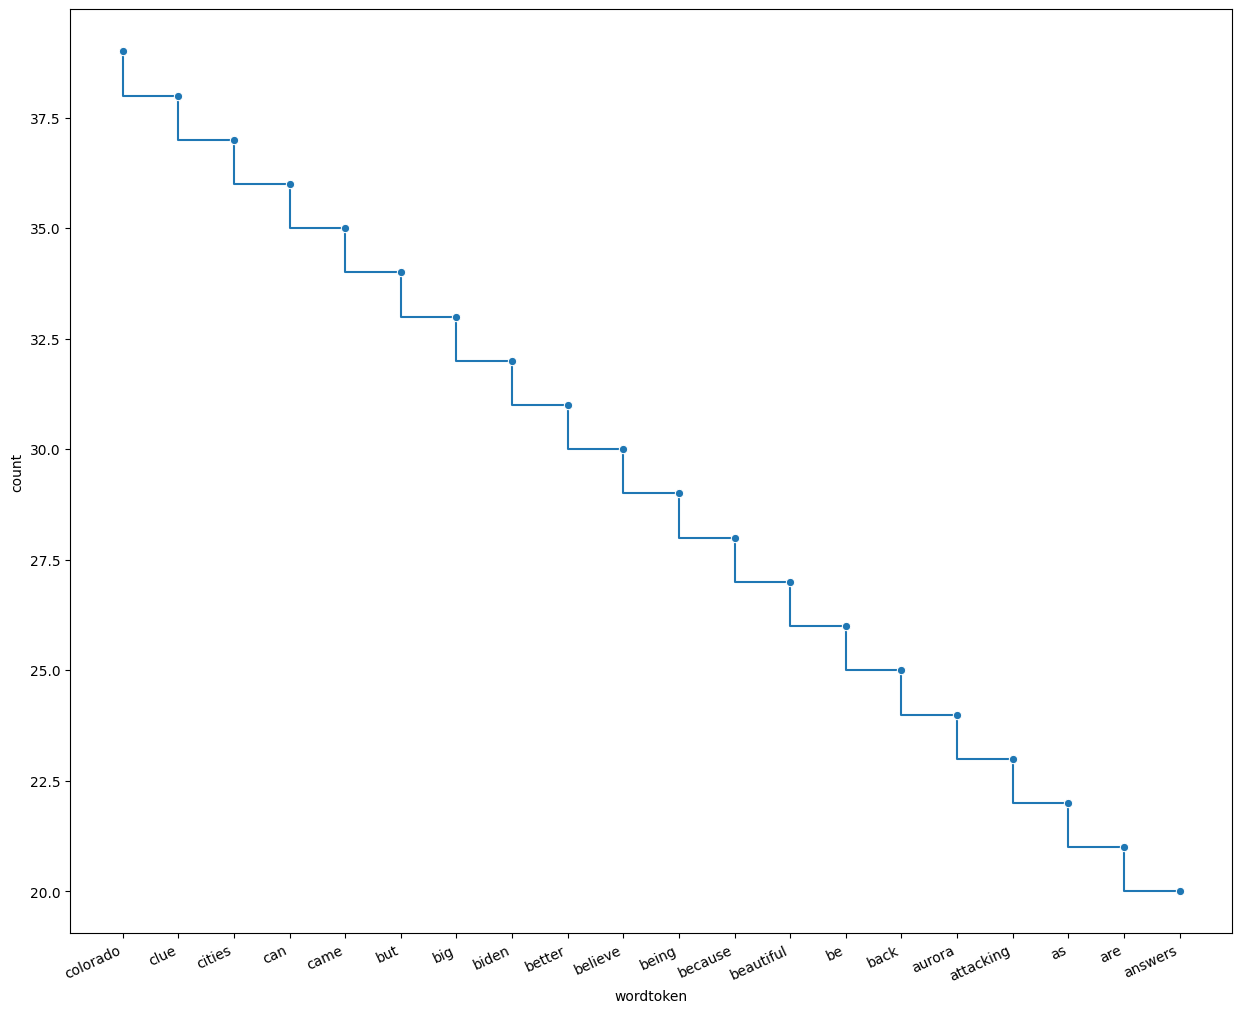

In [365]:
plt.figure(figsize=(15, 12))
sns.lineplot(x=trump_count_tokens.wordtoken[-40:-20], y=trump_count_tokens["count"][-40:-20], marker="o", drawstyle="steps-pre")

# y_ticks = range(trump_count_tokens["count"].min(), trump_count_tokens["count"].max()+1)

# plt.yticks(y_ticks)
# plt.ylim(215, trump_count_tokens["count"].max()+1)

plt.xticks(rotation=25, ha='right')

In [421]:
trump_count_tokens["proportion"] =  trump_count_tokens["count"] / trump_count_tokens["count"].sum()

trump_count_tokens.head(20)

,wordtoken,count,proportion
0,you,238,0.008368
1,wouldn,237,0.008333
2,word,236,0.008298
3,without,235,0.008263
4,within,234,0.008228
5,with,233,0.008192
6,why,232,0.008157
7,while,231,0.008122
8,which,230,0.008087
9,where,229,0.008052


In [479]:
def basic_sentence_generator():
    words_sampled = np.random.multinomial(n=100, pvals=trump_count_tokens["proportion"].values)
    words_dict = {idx: val for idx, val in enumerate(words_sampled)}

    words_sling = []

    for idx, word_id in words_dict.items():
        if word_id > 0:
            words_sling.append( [trump_count_tokens["wordtoken"][idx]] * word_id )
        else:
            words_sling.append( [] )

    return sum(words_sling, [])
    


In [501]:
basic_sentence_generator()

['you',
 'you',
 'you',
 'you',
 'wouldn',
 'wouldn',
 'wouldn',
 'word',
 'without',
 'with',
 'with',
 'with',
 'while',
 'which',
 'which',
 'whatsoever',
 'what',
 'were',
 'were',
 'well',
 'watching',
 'victory',
 'very',
 'very',
 'very',
 'venezuelan',
 'venezuelan',
 'trouble',
 'trouble',
 'trouble',
 'took',
 'today',
 'to',
 'thousands',
 'they',
 'they',
 'these',
 'then',
 'talking',
 'taking',
 'supremes',
 'state',
 'state',
 'spewing',
 'sounds',
 'sounds',
 'something',
 'something',
 'soldiers',
 'soldiers',
 'sleepy',
 'sleepy',
 'sleepy',
 'showed',
 'saw',
 'right',
 'reminded',
 'really',
 're',
 're',
 're',
 'rasmussen',
 'radical',
 'quite',
 'quite',
 'policies',
 'points',
 'points',
 'plans',
 'plans',
 'philadelphia',
 'our',
 'one',
 'one',
 'on',
 'offered',
 'now',
 'no',
 'nights',
 'my',
 'my',
 'monumental',
 'million',
 'meaningless',
 'lot',
 'long',
 'liberal',
 'let',
 'know',
 'kamala',
 'just',
 'it',
 'invading',
 'in',
 'hoaxes',
 'hello',
 '

In [538]:

lines = [line.strip() for line in trump_speech_las_vegas_partial.strip().split("\n") if line.strip()]

nested_list = [[line] for line in lines]
nested_list

[['Thank you very much, everybody. Hello, Las Vegas. Hello, Las Vegas.'],
 ['I’m thrilled to be back in this incredible state with thousands of proud, hardworking American patriots, which is what you are.'],
 ['As you all saw three months ago, we had a monumental victory. We had a beautiful victory three months ago.'],
 ['And then, a couple of nights ago, we had an even better victory. We took her on, Comrade Kamala Harris.'],
 ['We took her on and we did really well. Every poll had us up like 90, 92, 87. We actually had one, 92 to 6, which sounds about right because now today, Rasmussen just came up, and we were six points up.'],
 ['So, it’s pretty good. Pretty good. We dismantled her terrible record, we exposed her radical liberal agenda, and we laid out our plans to quite simply make America great again.'],
 ['Meanwhile, Comrade Kamala Harris, Comrade showed up, spewing lies and meaningless platitudes with no plans, no policies, and no solutions whatsoever. She doesn’t have a clue.'

In [541]:
for idx, val in enumerate(nested_lines):
    word_tokens = nltk.sent_tokenize(str(val).lower())
    
    print(word_tokens)

["['thank', 'you', 'very', 'much,', 'everybody.", "', 'hello,', 'las', 'vegas.", "', 'hello,', 'las', 'vegas.']"]
["['i’m', 'thrilled', 'to', 'be', 'back', 'in', 'this', 'incredible', 'state', 'with', 'thousands', 'of', 'proud,', 'hardworking', 'american', 'patriots,', 'which', 'is', 'what', 'you', 'are.']"]
["['as', 'you', 'all', 'saw', 'three', 'months', 'ago,', 'we', 'had', 'a', 'monumental', 'victory.", "', 'we', 'had', 'a', 'beautiful', 'victory', 'three', 'months', 'ago.']"]
["['and', 'then,', 'a', 'couple', 'of', 'nights', 'ago,', 'we', 'had', 'an', 'even', 'better', 'victory.", "', 'we', 'took', 'her', 'on,', 'comrade', 'kamala', 'harris.']"]
["['we', 'took', 'her', 'on', 'and', 'we', 'did', 'really', 'well.", "', 'every', 'poll', 'had', 'us', 'up', 'like', '90,', '92,', '87.", "', 'we', 'actually', 'had', 'one,', '92', 'to', '6,', 'which', 'sounds', 'about', 'right', 'because', 'now', 'today,', 'rasmussen', 'just', 'came', 'up,', 'and', 'we', 'were', 'six', 'points', 'up.']"]
